<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Составление-портрета-пользователя-каждого-региона" data-toc-modified-id="Составление-портрета-пользователя-каждого-региона-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Составление портрета пользователя каждого региона</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование закономерности успеха игры

Интернет-магазин «Стримчик» продаёт по всему миру
компьютерные игры. Из открытых источников доступны исторические данные о
продажах игр, оценки пользователей и экспертов, жанры и платформы
(например, Xboxили PlayStation). Выявим определяющие успешность
игры закономерности. Это позволит сделать ставку на потенциально популярный
продукт и спланировать рекламные кампании.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating
Board) — это ассоциация, определяющая возрастной рейтинг компьютерных
игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную
категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для
подростков».

# Описание данных:

* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Изучение данных из файла

Откроем файл с данными и изучим общую информацию.

Импортируем необходимые библиотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

Откроем файл с данными.

In [2]:
games = pd.read_csv('/datasets/games.csv')

Выведем первые пять строк наших данных.

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Посмотрим на основные статистические данные.

In [4]:
games.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


Посмотрим на общую информацию данных.

In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Итак, в таблице 11 столбцов и 16715 строк. 

Согласно документации к данным:
* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Вывод

Таблица описывает основные параметры игр, сами игры, продажи в разных регионах, оценки пользователей и критиков, рейтинг игр с 1980 по 2016 год.

Из статистических данных можно сделать вывод о положительной скошенности продаж на всех регионах. Средние значения больше медианных. Учитывая максимальные и минимальные значения продаж и стандартные отклонения, можно сказать о больших выбросах. 

Предварительно можно утверждать, что, данных достаточно для исследования. Но для работы с данными необходимо:
* привести названия столбцов и значения некоторых столбцов к нижнему регистру;
* преобразовать данные к нужному типу;
* обработать пропуски;
* добавить новый столбец суммарных продаж по всем регионам.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Подготовка данных

Преобразуем названия колонок в нижний регистр.

In [6]:
games.columns = games.columns.str.lower()

Преобразуем значения колонок в нижний регистр.


In [7]:
games.name = games.name.str.lower() # колонка названия игры
games.platform = games.platform.str.lower() # колонка платформы
games.genre = games.genre.str.lower() # колонка жанра
games.rating = games.rating.str.lower() # колонка рейтинга

Удаляем строки с пропущенными значениями.

In [8]:
games.dropna(subset=['name'], inplace=True) # колонка названия игры
games.dropna(subset=['year_of_release'], inplace=True) # колонка года выпуска игры

Преобразуем `float` в `int` для года выхода.

In [9]:
games.year_of_release = games.year_of_release.astype('int')

Заполним пропущенные значения оценок критиков медианным значением.

In [10]:
# games['critic_score'] = games['critic_score']
# .fillna(games.groupby('genre')['critic_score'].transform('median'))
games['critic_score'] = games['critic_score'].fillna(-5)

Заполним значения `tbd` на пропущенные значения.


In [11]:
games.loc[games.user_score=='tbd', 'user_score'] = np.nan

Преобразуем `object` в `float` для оценки пользоватлей.


In [12]:
games.user_score = games.user_score.astype('float64')

Заполним пропущенные значения оценок пользователей медианным значением.

In [13]:
#games['user_score'] = games['user_score'].fillna(games.groupby('genre')['user_score'].transform('median'))
games['user_score'] = games['user_score'].fillna(-1)

Заполним пропущенные значения рейтинга на `unknow`.

In [14]:
games.rating = games.rating.fillna('unknow')

Gосмотрим на общую информацию данных.


In [15]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Суммируем продажи игр по всем регионам.


In [16]:
games['sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

Проверим на дубликаты.

In [17]:
games.duplicated().sum()

0

Выведем таблицу с добавленным столбцом.

In [18]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-5.0,-1.0,unknow,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-5.0,-1.0,unknow,31.38


### Вывод

При "очистке" данных были приведены к нижнему регистру названия столбцов и значения некоторых столбцов, преобразованы данные к нужному типу, добавлен новый столбец по суммарным продажам по всем регионам и обработаны пропуски. Дубликаты отсутствуют.

В значениях оценки пользователей присутствовало аббревиатура `tbd`, означающее `предстоит определить`. Поскольку значительная часть знаений столбца `user_score` имело `tbd`, было решено заменить их медианными значениями оценок пользователей сгруппированными по жанрам.

## Исследовательский анализ данных

Построим график - количество игр выпущенных за все годы.


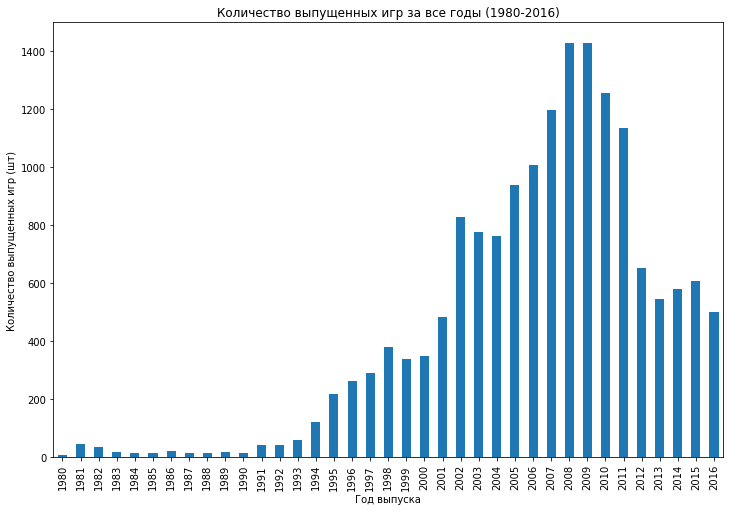

In [19]:
(games
 .pivot_table(index='year_of_release', values='name', aggfunc='count')
 .plot(kind='bar', figsize=(12, 8))
)
plt.legend([], frameon=False)
plt.xlabel('Год выпуска')
plt.ylabel('Количество выпущенных игр (шт)')
plt.title('Количество выпущенных игр за все годы (1980-2016)')
plt.show()

Можно сказать, что стремительный рост выпуска игр началось с 1994 года. Урожайным годом выпуска игр были 2008-2009 год. После пошел спад.

Построим график - топ 10 продаж по платформам.


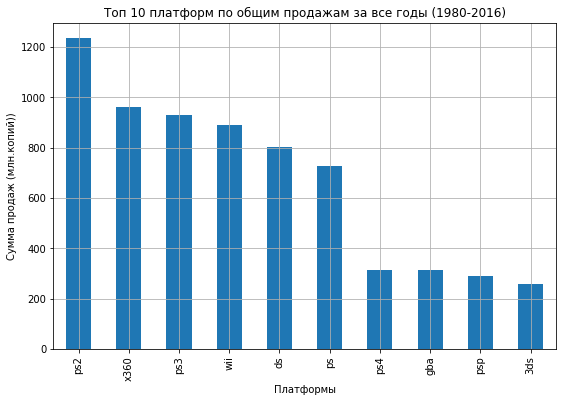

In [20]:
(games.pivot_table(index='platform', values='sales', aggfunc='sum')
 .sort_values(by = 'sales', ascending = False)[:10]
 .plot(kind='bar', grid=True, style='o-', figsize=(9, 6))
)
plt.legend([], frameon=False)
plt.xlabel('Платформы')
plt.ylabel('Сумма продаж (млн.копий))')
plt.title('Топ 10 платформ по общим продажам за все годы (1980-2016)')
plt.show()

Лидирующая позиция по суммарным продажам у платформы `ps2`.

Преобразуем названия топ 10 платформ по продажам в индексы, чтобы вывести потом графики.

In [21]:
platform_top = games.groupby('platform').agg({'sales':'sum'}).sort_values(by = 'sales', ascending = False)[:10].index

Выведем суммарные продажи сгруппированные по платформам и году выпуска игр.

In [22]:
platform_top_sum = games.groupby(['platform', 'year_of_release'], as_index=False).agg({'sales':'sum'})

Построим график для топ 10 платформ по суммарным продажам.


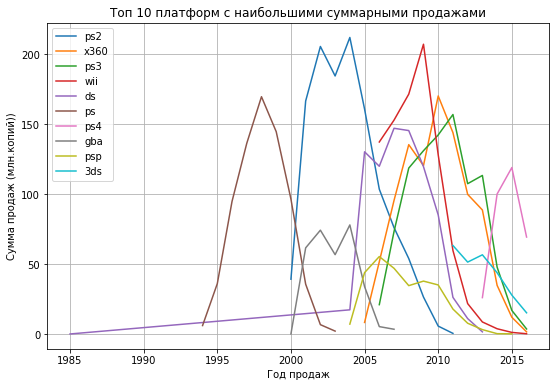

In [23]:
fig, ax = plt.subplots()

for i in platform_top:
    (platform_top_sum[platform_top_sum['platform']==i]
     .plot.line(x='year_of_release', y='sales', ax=ax, grid=True, figsize=(9, 6))
    )
plt.xlabel('Год продаж')
plt.ylabel('Сумма продаж (млн.копий))')
plt.title('Топ 10 платформ с наибольшими суммарными продажами')
ax.legend(platform_top)
plt.show()

Платформа `ds` была первой из 10 кто начал раньше выпускать игры с 1985 по 2013 год. Эта же платформа являлось самой долговыпускаемой платформой, выпускающие игры. 
У большей частии платформ из топ 10 примерная продолжительность жизни 7-10 лет. 

Срежем данные применив фильтрацию по году выпуска. Это годы актуального периода. 

In [24]:
current_period = games.query('2013 <= year_of_release <= 2016') 

Преобразуем названия платформ по продажам в индексы.

In [25]:
current_period_platform_top = (current_period.groupby('platform').agg({'sales':'sum'})
                               .sort_values(by = 'sales', ascending = False).index)

Выведем суммарные продажи сгруппированные по платформам и году выпуска игр.


In [26]:
current_period_platform_top_sum = (current_period.groupby(['platform', 'year_of_release'], as_index=False)
                                   .agg({'sales':'sum'}))

Построим график для платформ по суммарным продажам в актуальный период.


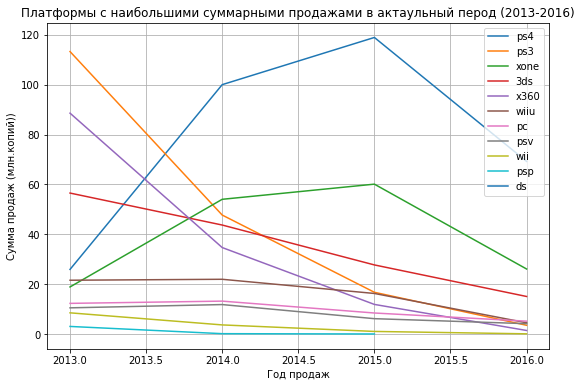

In [27]:
fig, ax = plt.subplots()
for i in current_period_platform_top:
    (current_period_platform_top_sum[current_period_platform_top_sum['platform']==i]
     .plot.line(x='year_of_release', y='sales', ax=ax, grid=True, figsize=(9, 6))
    )
plt.xlabel('Год продаж')
plt.ylabel('Сумма продаж (млн.копий))')
plt.title('Платформы с наибольшими суммарными продажами в актаульный перод (2013-2016)')
ax.legend(current_period_platform_top)
plt.show()

Актуальным периодом можно считать начиная с 2013 года. Можно увидеть, что все, кроме двух платформ, а именно `ps4` и `xone`, хорошо двигались по продажам, но затем сбавили темпы. Потенциально прибыльными платформами могут стать `psv` и `pc`.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.


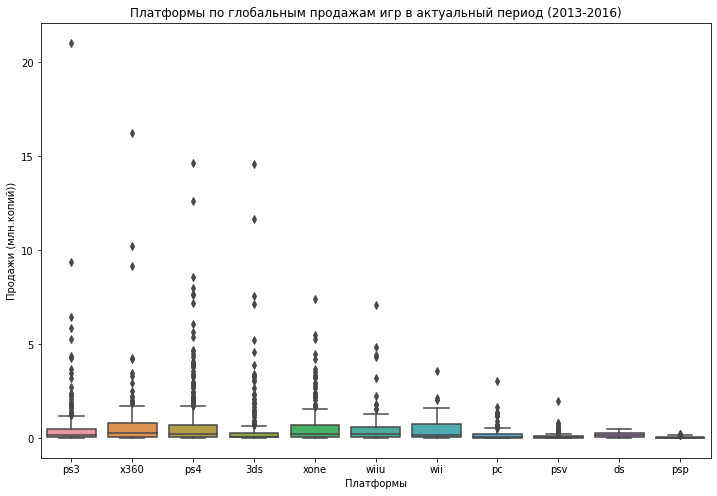

In [28]:
fig, ax = plt.subplots(figsize =(12,8))
sns.boxplot(x = 'platform', 
            y = 'sales',
            data = current_period, ax=ax
           )
plt.xlabel('Платформы')
plt.ylabel('Продажи (млн.копий))')
plt.title('Платформы по глобальным продажам игр в актуальный период (2013-2016)')
plt.show()

Не очень наглядно. Изменим масштаб, чтобы лучше увидеть "ящик с усами".

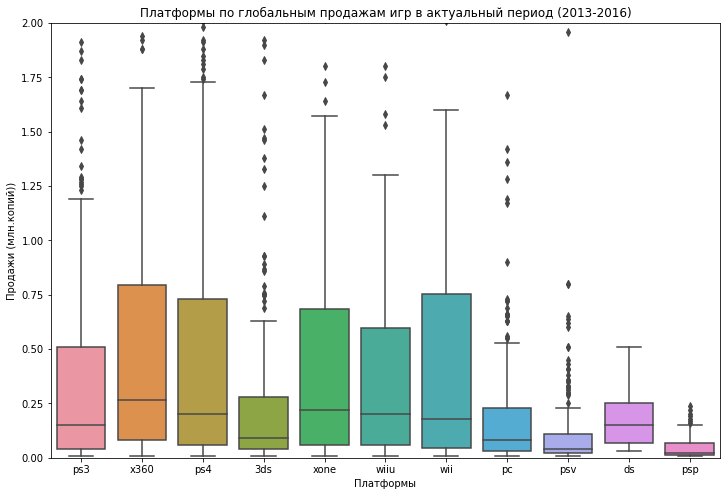

In [29]:
fig, ax = plt.subplots(figsize =(12,8))
sns.boxplot(x = 'platform', 
            y = 'sales',
            data = current_period, ax=ax
           )
plt.xlabel('Платформы')
plt.ylabel('Продажи (млн.копий))')
plt.title('Платформы по глобальным продажам игр в актуальный период (2013-2016)')
plt.ylim(0, 2)
plt.show()

Большой объем продаж в актуальный период у платформ `x360`, `wii` и `ps4`. Если судить по медиане, то "большой чек" продаж у `x360`. 

Диаграмма рассеяния по глобальным продажам внутри платформы `ps4` в зависимости от оценок критиков и пользователей.

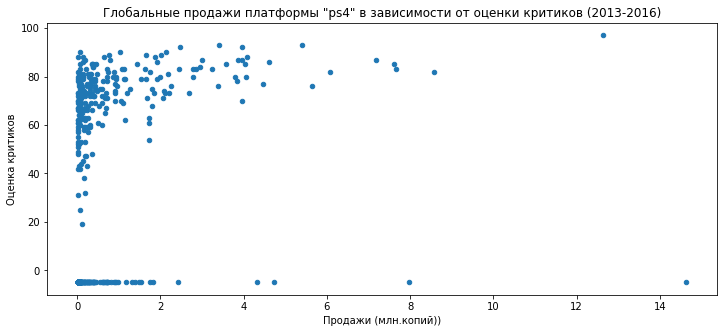

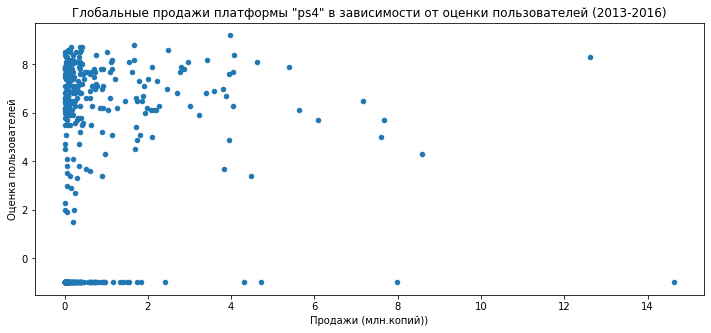

In [30]:
# для критиков
current_period.query('platform == "ps4"').plot(x='sales', y='critic_score', kind='scatter', figsize=(12, 5))
plt.xlabel('Продажи (млн.копий))')
plt.ylabel('Оценка критиков')
plt.title('Глобальные продажи платформы "ps4" в зависимости от оценки критиков (2013-2016)')
plt.show()
# для пользователей
current_period.query('platform == "ps4"').plot(x='sales', y='user_score', kind='scatter', figsize=(12, 5))
plt.xlabel('Продажи (млн.копий))')
plt.ylabel('Оценка пользователей')
plt.title('Глобальные продажи платформы "ps4" в зависимости от оценки пользователей (2013-2016)')
plt.show()

Большая часть продаж у платформы `ps4` лежит в диапазоне до 0,75 млн.копий. Немного видна зависимость между продажами от оценки критиков. Зависимость между продажами от оценок пользователей слабовыраженная. 

В самой нижней части это заполненные значения, которые не берем в расчет. 

Посчитаем корреляцию между отзывами критиков и продажами, и отзывами пользователей и продажами.


In [31]:
corr_critic = (current_period.query('platform == "ps4" and critic_score>0')['critic_score']
               .corr(current_period.query('platform == "ps4"')['sales'])
              )
corr_user = (current_period.query('platform == "ps4" and user_score>0')['user_score']
             .corr(current_period.query('platform == "ps4"')['sales'])
            )
print(f'Корреляция между отзывами критиков и продажами {corr_critic:.2%}')
print(f'Корреляция между отзывами пользователей и продажами {corr_user:.2%}')

Корреляция между отзывами критиков и продажами 40.66%
Корреляция между отзывами пользователей и продажами -3.20%


Посчитаем корреляцию отбросив данные не попадающие в ящик с усами. 

In [32]:
corr_critic = (current_period.query('platform == "ps4" and sales<=1.75 and critic_score>0')['critic_score']
               .corr(current_period.query('platform == "ps4" and sales<=1.75')['sales'])
              )
corr_user = (current_period.query('platform == "ps4" and sales<=1.75 and user_score>0')['user_score']
             .corr(current_period.query('platform == "ps4" and sales<=1.75')['sales'])
            )
print(f'Корреляция между отзывами критиков и продажами {corr_critic:.2%}')
print(f'Корреляция между отзывами пользователей и продажами {corr_user:.2%}')

Корреляция между отзывами критиков и продажами 27.26%
Корреляция между отзывами пользователей и продажами 1.14%


Диаграммы рассения и расчет корреляции платформы `ps4` показали положительную зависимость между отзывами критиков и продажами и слабую отрицательную зависимость между отзывами пользователей и продажами.

После того как отбросили значения продаж не попадающие в ящик продаж корреляция между отзывами критиков и продажами стала меньше, а корреляция между отзывами пользователей и продажами стала положительной и тоже уменьшилась. 

Можно сделать вывод, что зависимость между отзывами критиков и продажами есть, но маленькая, а между отзывами пользователей и продажами практически отсутсвует.

Диаграмма рассеяния по глобальным продажам внутри платформы `x360` в зависимости от оценок критиков и пользователей.

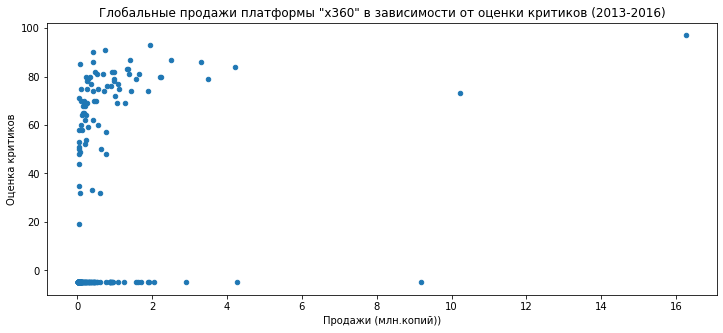

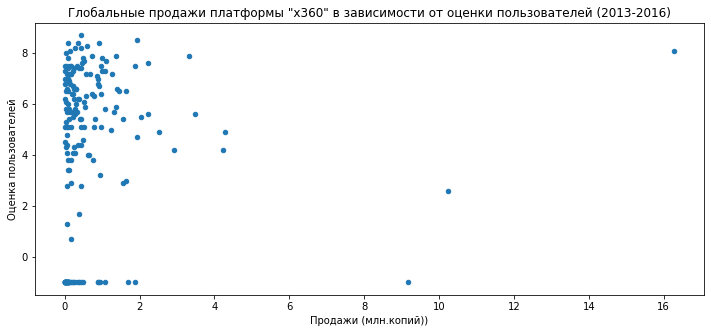

In [33]:
# для критиков
current_period.query('platform == "x360"').plot(x='sales', y='critic_score', kind='scatter', figsize=(12, 5))
plt.xlabel('Продажи (млн.копий))')
plt.ylabel('Оценка критиков')
plt.title('Глобальные продажи платформы "x360" в зависимости от оценки критиков (2013-2016)')
plt.show()
# для пользователей
current_period.query('platform == "x360"').plot(x='sales', y='user_score', kind='scatter', figsize=(12, 5))
plt.xlabel('Продажи (млн.копий))')
plt.ylabel('Оценка пользователей')
plt.title('Глобальные продажи платформы "x360" в зависимости от оценки пользователей (2013-2016)')
plt.show()

Большая часть продаж у платформы `x360` лежит в диапазоне до 0,80 млн.копий. Видна зависимость между продажами от оценки критиков. Зависимость между продажами от оценок пользователей слабовыраженная.

Посчитаем корреляцию между отзывами критиков и продажами, и отзывами пользователей и продажами.


In [34]:
corr_critic = (current_period.query('platform == "x360" and sales<=1.70 and critic_score>0')['critic_score']
               .corr(current_period.query('platform == "x360" and sales<=1.70')['sales'])
              )

corr_user = (current_period.query('platform == "x360" and sales<=1.70 and user_score>0')['user_score']
             .corr(current_period.query('platform == "x360" and sales<=1.70')['sales'])
            )
print(f'Корреляция между отзывами критиков и продажами {corr_critic:.2%}')
print(f'Корреляция между отзывами пользователей и продажами {corr_user:.2%}')

Корреляция между отзывами критиков и продажами 47.20%
Корреляция между отзывами пользователей и продажами 3.77%


У платформы `x360` положительная зависимость между отзывами критиков и продажами и слабая зависимость между отзывами пользователей и продажами.

Диаграмма рассеяния по глобальным продажам внутри платформы `xone` в зависимости от оценок критиков и пользователей.

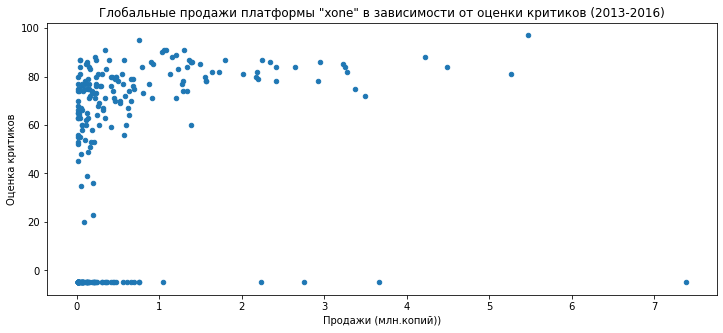

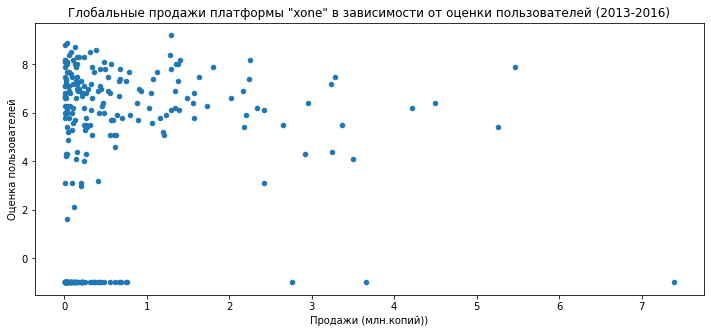

In [35]:
# для критиков
current_period.query('platform == "xone"').plot(x='sales', y='critic_score', kind='scatter', figsize=(12, 5))
plt.xlabel('Продажи (млн.копий))')
plt.ylabel('Оценка критиков')
plt.title('Глобальные продажи платформы "xone" в зависимости от оценки критиков (2013-2016)')
plt.show()
# для пользователей
current_period.query('platform == "xone"').plot(x='sales', y='user_score', kind='scatter', figsize=(12, 5))
plt.xlabel('Продажи (млн.копий))')
plt.ylabel('Оценка пользователей')
plt.title('Глобальные продажи платформы "xone" в зависимости от оценки пользователей (2013-2016)')
plt.show()

Большая часть продаж у платформы `xone` лежит в диапазоне до 0,70 млн.копий. Видна зависимость между продажами от оценки критиков. Зависимость между продажами от оценок пользователей слабовыраженная.

Посчитаем корреляцию между отзывами критиков и продажами, и отзывами пользователей и продажами.


In [36]:
corr_critic = (current_period.query('platform == "xone" and sales<=1.60 and critic_score>0')['critic_score']
               .corr(current_period.query('platform == "xone" and sales<=1.60')['sales'])
              )

corr_user = (current_period.query('platform == "xone" and sales<=1.60 and user_score>0')['user_score']
             .corr(current_period.query('platform == "xone" and sales<=1.60')['sales'])
            )
print(f'Корреляция между отзывами критиков и продажами {corr_critic:.2%}')
print(f'Корреляция между отзывами пользователей и продажами {corr_user:.2%}')

Корреляция между отзывами критиков и продажами 42.01%
Корреляция между отзывами пользователей и продажами 5.99%


У платформы `xone` положительная зависимость между отзывами критиков и продажами и слабая зависимость между отзывами пользователей и продажами.

Диаграмма рассеяния по глобальным продажам внутри платформы `wiiu` в зависимости от оценок критиков и пользователей.

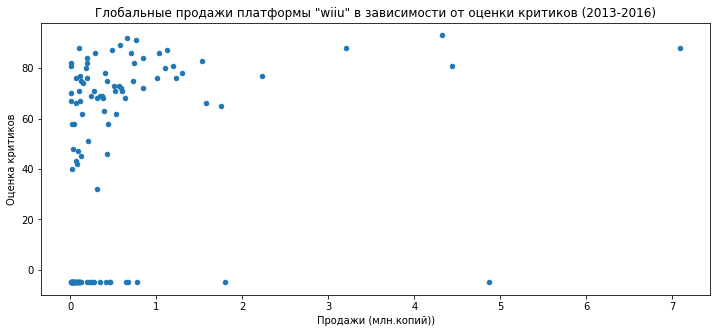

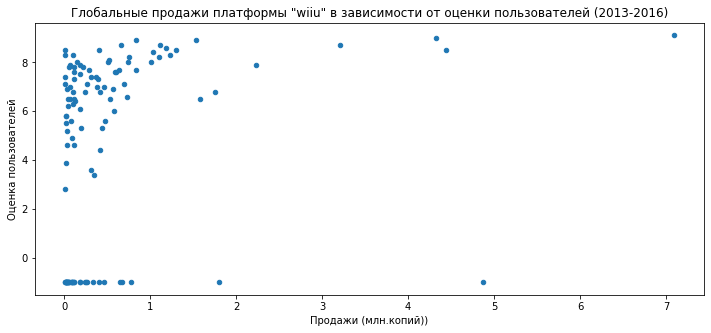

In [37]:
# для критиков
current_period.query('platform == "wiiu"').plot(x='sales', y='critic_score', kind='scatter', figsize=(12, 5))
plt.xlabel('Продажи (млн.копий))')
plt.ylabel('Оценка критиков')
plt.title('Глобальные продажи платформы "wiiu" в зависимости от оценки критиков (2013-2016)')
plt.show()
# для пользователей
current_period.query('platform == "wiiu"').plot(x='sales', y='user_score', kind='scatter', figsize=(12, 5))
plt.xlabel('Продажи (млн.копий))')
plt.ylabel('Оценка пользователей')
plt.title('Глобальные продажи платформы "wiiu" в зависимости от оценки пользователей (2013-2016)')
plt.show()

Большая часть продаж у платформы `wiiu` лежит в диапазоне до 0,60 млн.копий. На этот раз видна зависимость между продажами от оценки критиков и пользователей.

Посчитаем корреляцию между отзывами критиков и продажами, и отзывами пользователей и продажами.


In [38]:
corr_critic = (current_period.query('platform == "wiiu" and sales<=1.30 and critic_score>0')['critic_score']
               .corr(current_period.query('platform == "wiiu" and sales<=1.30')['sales'])
              )

corr_user = (current_period.query('platform == "wiiu" and sales<=1.30 and user_score>0')['user_score']
             .corr(current_period.query('platform == "wiiu" and sales<=1.30')['sales'])
            )
print(f'Корреляция между отзывами критиков и продажами {corr_critic:.2%}')
print(f'Корреляция между отзывами пользователей и продажами {corr_user:.2%}')

Корреляция между отзывами критиков и продажами 43.39%
Корреляция между отзывами пользователей и продажами 45.49%


У платформы `xone` сильная положительная зависимость между отзывами критиков и пользователей и продажами.

Посчитаем количество игр, суммарные продажи и медианы сгруппированные по жанрам.


In [39]:
genre_current_period = current_period.groupby('genre', as_index=True).agg({'name':'count', 'sales':['median','sum']})

Избавимся от мультииндекса.


In [40]:
genre_current_period.columns = genre_current_period.columns.map(''.join)

Поменяем названия колонок.


In [41]:
genre_current_period = (genre_current_period
                        .rename(columns={'namecount':'count', 'salesmedian':'median', 'salessum':'sum'})
                        .sort_values(by='sum', ascending=False)
                       )

Посмотрим на распределение игр по жанрам.


In [42]:
genre_current_period

,count,median,sum
genre,,,
action,766,0.110,321.87
shooter,187,0.450,232.98
sports,214,0.240,150.65
role-playing,292,0.125,145.89
misc,155,0.100,62.82
platform,74,0.225,42.63
racing,85,0.120,39.89
fighting,80,0.125,35.31
adventure,245,0.030,23.64


Если не брать в расчет `action` жанр, то у самых продаваемых жанров большое медианное значение и количество продаж. У малопродаваемых жанров низкое медианное значение. Также можно выделить жанр `adventure` у которого много проданных игр, но медианное значение самое низкое.

### Вывод

Обобщим все краткие вышеприведенные выводы. 

1994 год - год стремительного роста выпуска игр. Примерная продолжительность жизни платформ 7-10 лет. В актуальный период который начинается с 2013 года практически все платформы сбавляли темпы продаж. Зависимость между отзывами критиков и продажами есть, но маленькая, а между отзывами пользователей и продажами практически отсутсвует. Жанры с низкими и высокими продажами имеют маленькое и высокое медианное значение соответственно. Исключение из жанров составляет `adventure`, у которого много проданных игр, но медианное значение самое низкое.

## Составление портрета пользователя каждого региона

Топ 5 платформ по продажам в Северной Америке.


In [43]:
na_sales_top = (current_period.groupby('platform')
                .agg({'na_sales':'sum', 'sales':'sum'}, as_index=False)
                .sort_values(by='na_sales', ascending=False)[:5]
               )
na_sales_top['ratio'] = na_sales_top.na_sales/na_sales_top.sales
na_sales_top

,na_sales,sales,ratio
platform,,,
ps4,108.74,314.14,0.346151
xone,93.12,159.32,0.584484
x360,81.66,136.80,0.596930
ps3,63.50,181.43,0.349997
3ds,38.20,143.25,0.266667


Топ 5 платформ по продажам в Европе.


In [44]:
eu_sales_top = (current_period.groupby('platform')
                .agg({'eu_sales':'sum', 'sales':'sum'}, as_index=False)
                .sort_values(by='eu_sales', ascending=False)[:5]
               )
eu_sales_top['ratio'] = eu_sales_top.eu_sales/eu_sales_top.sales
eu_sales_top

,eu_sales,sales,ratio
platform,,,
ps4,141.09,314.14,0.449131
ps3,67.81,181.43,0.373753
xone,51.59,159.32,0.323814
x360,42.52,136.80,0.310819
3ds,30.96,143.25,0.216126


Топ 5 платформ по продажам в Японии.


In [45]:
jp_sales_top = (current_period.groupby('platform')
                .agg({'jp_sales':'sum', 'sales':'sum'}, as_index=False)
                .sort_values(by='jp_sales', ascending=False)[:5]
               )
jp_sales_top['ratio'] = jp_sales_top.jp_sales/jp_sales_top.sales
jp_sales_top

,jp_sales,sales,ratio
platform,,,
3ds,67.81,143.25,0.473368
ps3,23.35,181.43,0.128700
psv,18.59,32.99,0.563504
ps4,15.96,314.14,0.050805
wiiu,10.88,64.63,0.168343


Большая доля продаж наблюдается в Северной Америке. По объему продаж лидирующая платформа в Северной Америке и Европе - `ps4`, Японии - `3ds`. Ожидаемые результаты. Запад на своей платформе, Япония со своим легендарным Нинтендо.

Топ 5 жанров по продажам в Северной Америке.


In [46]:
current_period.groupby('genre').agg({'na_sales':'sum'}, as_index=False).sort_values(by='na_sales', ascending=False)[:5]

,na_sales
genre,
action,126.05
shooter,109.74
sports,65.27
role-playing,46.40
misc,27.49


Топ 5 жанров по продажам в Европе.


In [47]:
current_period.groupby('genre').agg({'eu_sales':'sum'}, as_index=False).sort_values(by='eu_sales', ascending=False)[:5]

,eu_sales
genre,
action,118.13
shooter,87.86
sports,60.52
role-playing,36.97
racing,20.19


Топ 5 жанров по продажам в Японии.


In [48]:
current_period.groupby('genre').agg({'jp_sales':'sum'}, as_index=False).sort_values(by='jp_sales', ascending=False)[:5]

,jp_sales
genre,
role-playing,51.04
action,40.49
misc,9.20
fighting,7.65
shooter,6.61


В Европе и Северной Америке наиболее популярным жанром является `action`. В Японии традиционно лидирует жанр `role-playing	` или сокращенно `RPG`.

Влияние рейтинга на продажи в Северной Америке.


In [49]:
current_period.groupby('rating').agg({'na_sales':'sum'}, as_index=False).sort_values(by='na_sales', ascending=False)[:5]

,na_sales
rating,
m,165.21
unknow,89.42
e,79.05
e10+,54.24
t,49.79


Влияние рейтинга на продажи в Европе.


In [50]:
current_period.groupby('rating').agg({'eu_sales':'sum'}, as_index=False).sort_values(by='eu_sales', ascending=False)[:5]

,eu_sales
rating,
m,145.32
e,83.36
unknow,78.91
e10+,42.69
t,41.95


Влияние рейтинга на продажи в Японии.


In [51]:
current_period.groupby('rating').agg({'jp_sales':'sum'}, as_index=False).sort_values(by='jp_sales', ascending=False)[:5]

,jp_sales
rating,
unknow,85.05
t,20.59
e,15.14
m,14.11
e10+,5.89


Рейтинг ESRB влияет на продажи. Так, в Европе и Северной Америке большие продажи приходятся на рейтинг `m` - от 17 лет. В Японии точно не сказать, так как мы не можем восстановить рейтинг для строк со значением `unknow`. После идут игры для подростков, и замыкают тройку игры для всех.

### Вывод

По долям продаж сгруппированным по платформам лидирует Северная Америка. Самый популярный жанр - `action`. Большие продажи пришлись на рейтинг m. 

## Проверка гипотез

Первая гипотеза.

Нулевая гипотеза: cредние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые.

Альтернативная гипотеза : средние пользовательские рейтинги платформ `Xbox One` и `PC` отличаются.

Перед проверкой гипотезы посчитаем дисперсии данных.

In [52]:
var_xone = st.variation(current_period.query('platform == "xone" and user_score>0')['user_score'])
var_pc = st.variation(current_period.query('platform == "pc" and user_score>0')['user_score'])
print(f'Дисперсия "xone" равно: {var_xone}.')
print(f'Дисперсия "pc" равно: {var_pc}.')

Дисперсия "xone" равно: 0.21117175955065698.
Дисперсия "pc" равно: 0.27700813763090737.


Применим метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам. Дисперсии не равны, поэтому применим при проверке гипотезы параметр `equal_var`.

In [53]:
alpha = .05

results = st.ttest_ind(current_period.query('platform == "xone" and user_score>0')['user_score'],
                            current_period.query('platform == "pc" and user_score>0')['user_score'],
                      equal_var=False) 

print('p-значение:', results.pvalue)

if results.pvalue<alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что вероятность получить такое или большее различие случайно почти 5%. Нулевая гипотеза не подтвердилась, значит средние пользовательские рейтинги платформ `Xbox One` и `PC` отличаются.

Вторая гипотеза.

Нулевая гипотеза: средние пользовательские рейтинги жанров `Action` и `Sports` одинаковые.

Альтернативна гипотеза: средние пользовательские рейтинги жанров `Action` и `Sports` разные.

Перед проверкой гипотезы посчитаем дисперсии данных.

In [54]:
var_action = st.variation(current_period.query('genre == "action" and user_score>0')['user_score'])
var_sports = st.variation(current_period.query('genre == "sports" and user_score>0')['user_score'])
print(f'Дисперсия "action" равно: {var_action}.')
print(f'Дисперсия "sports" равно: {var_sports}.')

Дисперсия "action" равно: 0.19428975257918113.
Дисперсия "sports" равно: 0.33940490551700886.


Проверим вторую гипотезу. Дисперсии не равны, поэтому также применим при проверке гипотезы параметр equal_var.

In [55]:
results = st.ttest_ind(current_period.query('genre == "action" and user_score>0')['user_score'],
                            current_period.query('genre == "sports" and user_score>0')['user_score'],
                      equal_var=False)   

print('p-значение:', results.pvalue)

if results.pvalue<alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Полученное значение p-value говорит о том, что вероятность получить такое или большее различие случайно почти 0%. Нулевая гипотеза не подтвердилась, значит средние пользовательские рейтинги жанров `Action` и `Sports` разные.

## Общий вывод

"Индустриализация" в мире игр началось в 1994 году. Годом большего количества выпущенных игр является 2008 и 2009. 

Лидирующие позиции платформ по суммарным продажам у `ps2`, `x360`, `ps3`. У большей частии платформ из топ 10 примерная продолжительность жизни 7-10 лет. Потенциально прибыльными платформами могут стать `psv`, `3ds` и `pc`.

При расчете корреляции одной из популярной платформы получили наличие зависимости продаж от отзывов критиков. 

Большая доля продаж наблюдается в Северной Америке. Самая большая доля продаж наблюдается в Северной Америки на платформе `xone`. В Европе и Северной Америке наиболее популярным жанром является `action`. В Японии традиционно лидирует жанр `role-playing` или сокращенно `RPG`.

В Европе топ 3 платформ - `ps4`, `ps3` и `xone`. В Северной Америке - `ps4`, `xone` и `x360`. В Японии - `3ds`, `ps3` и `psv`. 

Тройка лучших жанров в Северной Америке - `action`, `shooter` и `ports`. В Европе - `action`, `shooter` и `sports`. В Японии - `role-playing`, `action` и `misc`.

Cреди игроков Европы и Северной Америки наибеолее популярны игры для взрослых и для любого возраста. В то время как в Японии с большим отрывом лидируют игры, для которых рейтинг неустановлен. 

Проверка гипотез показала следующие результаты:

* средние пользовательские рейтинги платформ Xbox One и PC отличаются;
* средние пользовательские рейтинги жанров Action и Sports разные.

Из вышеперечисленного можно сказать что игра будет иметь успех если выйдет на платформе `Xbox One` с жанром `action`. 